In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [17]:
from cipher.caesar import *
from cipher.affine import *
from cipher.keyword_cipher import *

from support.text_prettify import *
from support.utilities import *
from support.plot_frequency_histogram import *
%matplotlib inline

In [3]:
challenge_number = 4
plaintext_a_filename = f'{challenge_number}a.plaintext'
plaintext_b_filename = f'{challenge_number}b.plaintext'
ciphertext_a_filename = f'{challenge_number}a.ciphertext'
ciphertext_b_filename = f'{challenge_number}b.ciphertext'

In [4]:
ca = open(ciphertext_a_filename).read()
cb = open(ciphertext_b_filename).read()

sca = sanitise(ca)
pca = letters(ca)
pta = depunctuate(ca)

scb = sanitise(cb)
pcb = letters(cb)
ptb = depunctuate(cb)

In [7]:
kshifta, score = caesar_break(sca, fitness=Ptrigrams)
kshifta

12

In [10]:
pa = caesar_decipher(sca, kshifta)
print(pa)

philmyvisittomeitnersgroupwasveryinterestingandpaidoffinanunexpectedwayasyoususpectednuclearenergyhasseriouspotentialandthereareanumberofgroupsworkingtorealisethatoneofmeitnerscollaboratorshasbeenincontactwithagroupofdissidentgermanscientistsclosetoeinsteinandtheyhavebeenpassingintelligenceconcerningthenazinuclearprogrammetotheswedishteamwhileiwasthereoneoftheircontactsinberlinsmuggledoutacopyofalettersentbythescientistsjoosandhanletowilhelmdamesatthereichserziehungsministeriumitoutlinesthepotentialmilitaryapplicationsofnuclearenergyandapparentlytheministerwassoimpressedbyitscontentsthatwithinaweekhehadconvenedatoplevelgrouptodeveloptheideaswithinitthebossteaminberlinhaverampedupmonitoringofcommunicationstoandfromtheministryandthemostpromisingleadistheattachedmemotheenvelopewasmarkeddiealchemisteniamnotsurehowfreeyouaretotravelbutihavetomeetupwithmynewnorwegianfriendsandthenheadbacktoenglandcouldyoumoveyourbasetofranceandmakecontactwithsomeofouralliesithinkweshouldopendiscussionswithth

In [12]:
fpa = lcat(tpack(segment(pa)))
print(fpa)

phil my visit to meitner s group was very interesting and paid off in an unexpected way as you
suspected nuclear energy has serious potential and there area number of groups working to realise
that one of meitner s collaborators has been in contact with a group of dissident german scientists
close to einstein and they have been passing intelligence concerning the nazi nuclear programme to
the swedish team while i was there one of their contacts in berlin smuggled out a copy of a letter
sent by the scientists joos and hanle to wilhelm dames at the reichs erziehung s ministerium it
outlines the potential military applications of nuclear energy and apparently the minister was so
impressed by its contents that within a week he had convened a toplevel group to develop the ideas
within it the boss team in berlin have ramped up monitoring of communications to and from the
ministry and the most promising lead is the attached memo the envelope was marked die alchemist en i
am not sure how free 

In [13]:
open(plaintext_a_filename, 'w').write(fpa)

1283

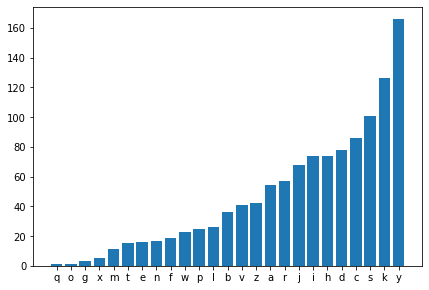

In [18]:
fc = collections.Counter(scb)
plot_frequency_histogram(fc, sort_key=fc.get)

In [14]:
(kwordb, kwrapb), score = keyword_break_mp(scb, fitness=Ptrigrams)
kwordb, kwrapb

('yerkes', <KeywordWrapAlphabet.from_last: 2>)

In [19]:
kwordb, score = simulated_annealing_break(scb, fitness=Ptrigrams)
kwordb

'heavywtrsqxzbcdfgijklmnopu'

In [24]:
print(keyword_decipher(cb, kwordb))

first meeting of die alchemisten committee, reichserjiehungsministerium, twenty ninth april nineteen thirty nine
the committee was reconvened by the minister at the request of the chancellor himself.
it is tasked with realising the military and industrial promise of nuclear energy.
the committee recognises the technical challenges involved in industrialising the processes hitherto conducted under laboratory conditions, but feels that the obstacles can be overcome by a combination of scientific and engineering excellence already possessed by the state.
the committee identified that the principle issue is that of controlling the nuclear reaction which is mediated by the energy of free neutrons. these need to be slowed to effectively harness their power, and to this end the committee recommends the acquisition of a suitable moderator.
the best-known candidate is deuterium and the best source of this material is the power plant at vemork in norway. the tronstad and brun electrolytic proces

In [20]:
pb = keyword_decipher(cb, 'heavywater', KeywordWrapAlphabet.from_last)
print(pb)

first meeting of die alchemisten committee, reichserziehungsministerium, twenty ninth april nineteen thirty nine
the committee was reconvened by the minister at the request of the chancellor himself.
it is tasked with realising the military and industrial promise of nuclear energy.
the committee recognises the technical challenges involved in industrialising the processes hitherto conducted under laboratory conditions, but feels that the obstacles can be overcome by a combination of scientific and engineering excellence already possessed by the state.
the committee identified that the principle issue is that of controlling the nuclear reaction which is mediated by the energy of free neutrons. these need to be slowed to effectively harness their power, and to this end the committee recommends the acquisition of a suitable moderator.
the best-known candidate is deuterium and the best source of this material is the power plant at vemork in norway. the tronstad and brun electrolytic proces

In [21]:
open(plaintext_b_filename, 'w').write(pb)

1399

In [28]:
print(keyword_cipher_alphabet_of('heavywater', KeywordWrapAlphabet.from_last))
print(kwordb)

heavywtrsuxzbcdfgijklmnopq
heavywtrsqxzbcdfgijklmnopu
